In [9]:
import os

def git_get():
    '''Get latest version from github'''
    os.system("git remote update")
    os.system("git pull")
    
def git_put(message):
    '''Adds/commits this notebook'''
    os.system("git add ML_projekt1.ipynb")
    os.system('git commit -m "{}"'.format(message))
    os.system("git push")

# Project starts here

In [117]:
%matplotlib inline 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# 1. Obtain Data

## Dataset source and description

The IMDB Movie Dataset from Kaggle.com, contains information from 5000 movies, obtained by webscraping IMDB.com. Note that the dataset has recently been removed from Kaggle and replaces with a new dataset which is not compliant with this notebook.

https://www.kaggle.com/tmdb/tmdb-movie-metadata/data


## Analysis goals

The ultimate goal for this dataanalysis is to determine which features make a movie "successful". The definition of "successful" is of course a bit vague, but during this dataanalysis we will define success as high popularity and/or gross revenue.

In our initial dataanalysis we will use regression to detemine if there is a correlation between IMDB score and revenue.

## Method of analysis

This analysis uses the OSEMN model.
https://machinelearningmastery.com/how-to-work-through-a-problem-like-a-data-scientist/

# 2. Scrub Data

# 3. Explore Data

# Analysis

In [38]:
data = {}
data['raw'] = pd.read_csv("movie_metadata.csv")
data['no_nan'] = data['raw'].dropna();
data['no_nan'].head(1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000


In [39]:
data['n_removed_nans'] = data['raw'].shape[0] - data['no_nan'].shape[0]
data['n_removed_nans']

1287

1. A description of your data set.
Explain
• What the problem of interest is (i.e. what is your data about),
• Where you obtained the data,
• What has previously been done to the data. (i.e. if available go through
some of the original source papers and read what they did to the data
and summarize what were their results).
• What the primary machine learning modeling aim is for the data, i.e.
which attributes you feel are relevant when carrying out a classification,
a regression, a clustering, an association mining, and an anomaly detection
in the later reports and what you hope to accomplish using these
techniques. For instance, which attribute do you wish to explain in the
regression based on which other attributes? Which class label will you predict based on which other attributes in the classification task? If you need to transform the data to admit these tasks, explain roughly how you might do this (but don’t transform the data now!).


<table>
  <tr>
    <th></th>
    <th>Supervised</th>
    <th>Unsupervised</th>
  </tr>
  <tr>
    <td>Continuous</td>
    <td>Regression</td>
    <td>Clustering</td>
  </tr>
  <tr>
    <td>Discrete</td>
    <td>Classification</td>
    <td>Association mining</td>
  </tr>
</table>

To get an overview of the dataset columns, we can look at the first entry in our dataframe.

In [81]:
# Check datatypes
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

2. A detailed explanation of the attributes of the data.
• Describe if the attributes are discrete/continous, Nominal/Ordinal/Interval/Ratio,
• give an account of whether there are data issues (i.e. missing values or
corrupted data) and describe them if so
• describe the basic summary statistics of the attributes.
If your data set contains many similar attributes, you may restrict yourself to
describing a few representative features (apply common sense).


## Data visualization

3. Data visualization(s) based on suitable visualization techniques including
a principal component analysis (PCA).
Touch upon the following subjects, use visualizations when it appears sensible.
Keep in mind the ACCENT principles and Tufte’s guidelines when you visualize
the data.
• Are there issues with outliers in the data,
• do the attributes appear to be normal distributed,
• are variables correlated,
• does the primary machine learning modeling aim appear to be feasible
based on your visualizations.
There are three aspects that needs to be described when you carry out the
PCA analysis for the report:
• The amount of variation explained as a function of the number of PCA
components included,
• the principal directions of the considered PCA components (either find a
way to plot them or interpret them in terms of the features),
• the data projected onto the considered principal components.
If your attributes have very different scales it may be relevant to standardize
the data prior to the PCA analysis.

# 4. Model Data

## Preprocessing

In [90]:
X = data['numerical'].values
X_std = StandardScaler().fit_transform(X)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

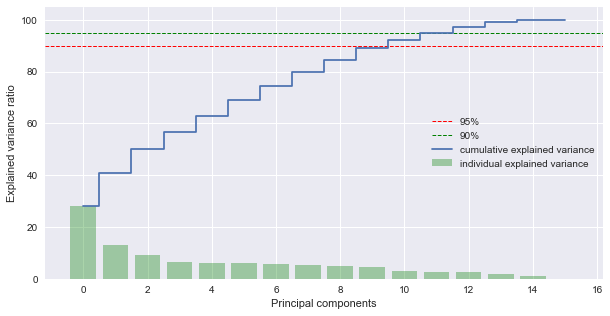

In [87]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(16), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.axhline(y=90, linewidth=1, color='r', linestyle='dashed', label="95%")
plt.axhline(y=95, linewidth=1, color='g', linestyle='dashed', label="90%")
plt.step(range(16), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

From this plot we can see that 9 components explain 90% of the total variance. To get up to 95% we need 12 components.

Create numerical data from raw data

In [65]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in data['raw'].iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = data['raw'].columns.difference(str_list)

data['numerical'] = data['raw'][num_list]
data['numerical'] = data['numerical'].fillna(value=0, axis=1)

Create correlation matrix from numerical features

In [ ]:
data['numerical_correlation'] = data['numerical'].corr()
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Movie Features')
#sns.heatmap(data['numerical'].astype(float).corr(),linewidths=0,vmax=0.5, square=True, cmap="cubehelix", linecolor='black', annot=True);
sns.heatmap(data['numerical_correlation'],vmax=1,square=True,annot=True,cmap='cubehelix')

From our correlation matrix (heatmap), we can see that some movie features correlate quite well. We will use these features later in our PCA.

## PCA

In [103]:
pca = PCA(n_components=9)
data['PCA9'] = pca.fit_transform(X_std)

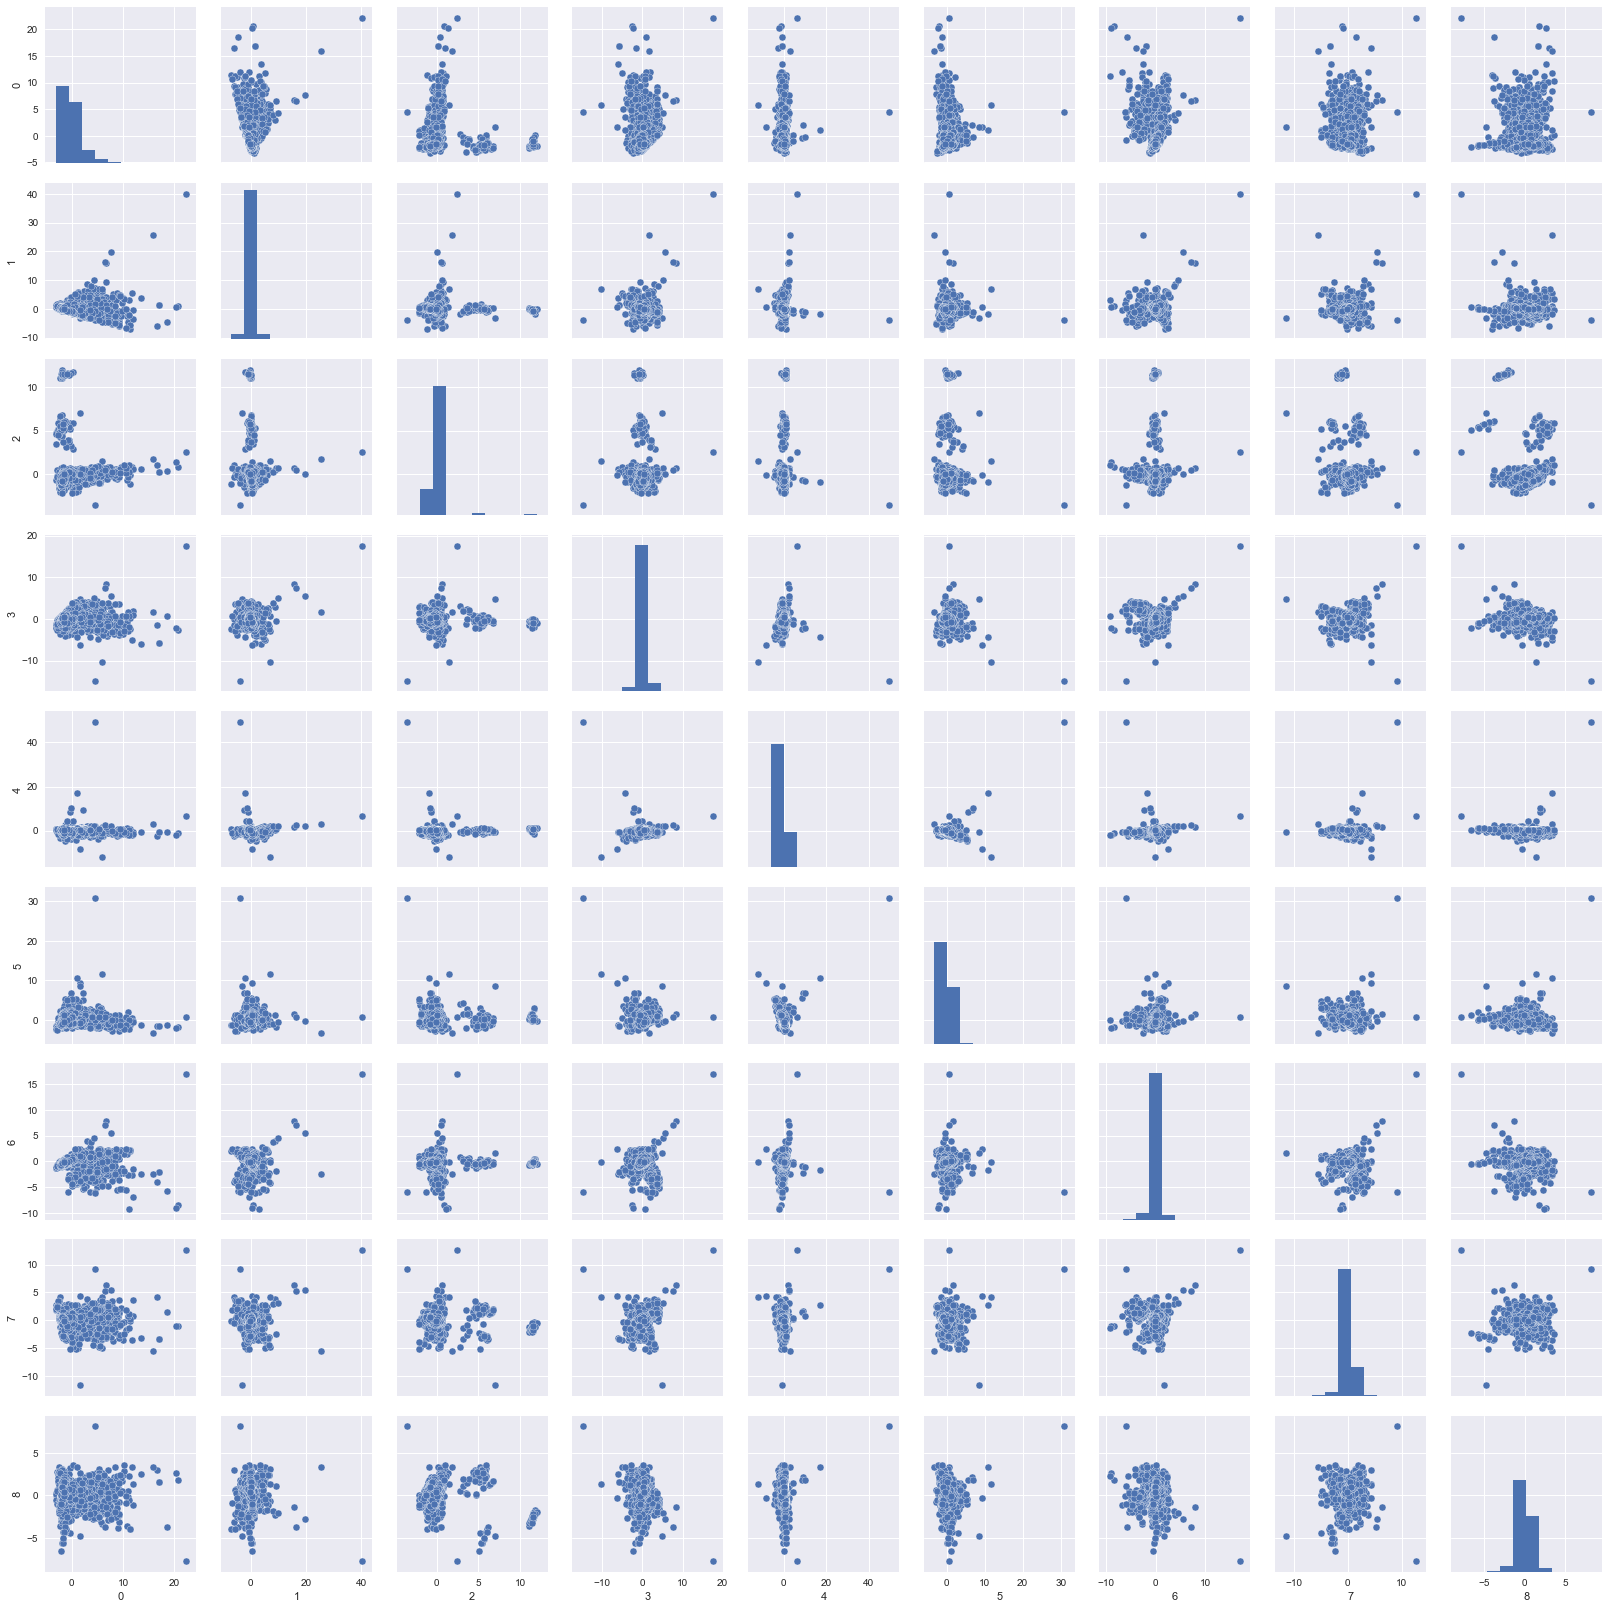

In [115]:
sns.pairplot(pd.DataFrame(data['PCA9']));

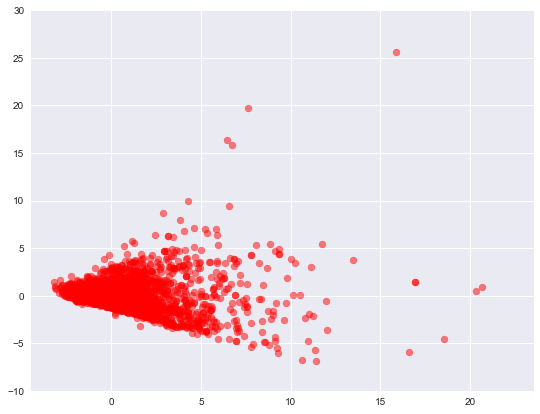

In [118]:
plt.figure(figsize = (9,7))
plt.scatter(data['PCA9'][:,0], data['PCA9'][:,1], c='red',alpha=0.5)
plt.ylim(-10,30)
plt.show()

By ploting component 0 against 1 we cannot really see anything useful.

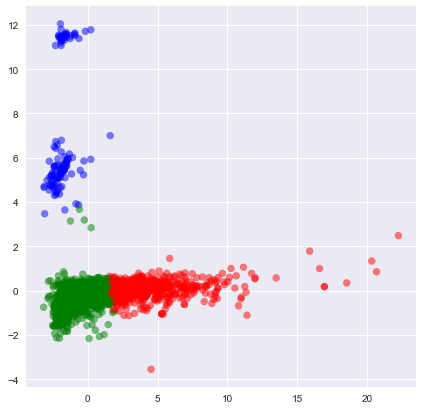

In [119]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(data['PCA9'])

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,2], c= label_color, alpha=0.5) 
plt.show()

c:\users\chris\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
c:\users\chris\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


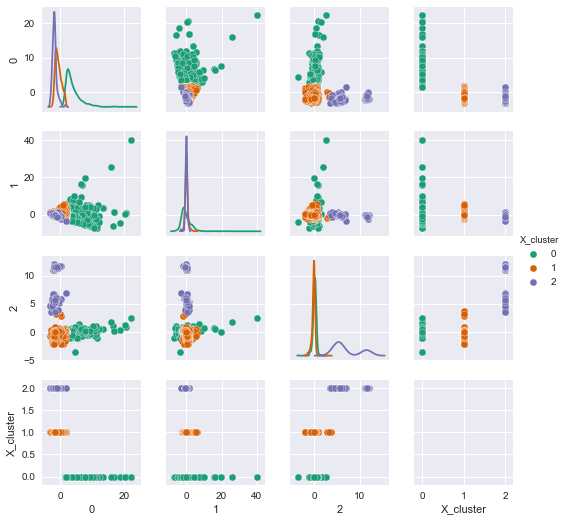

In [129]:
# Create a temp dataframe from our PCA projection data "x_9d"
df = pd.DataFrame(data['PCA9'])
df = df[[0,1,2]] # only want to visualise relationships between first 3 projections
df['X_cluster'] = X_clustered
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85);

# 5. Interpret Results